# Adult’s Income Per Year Using Data Mining 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train = pd.read_csv('adult.csv')
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:

train.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

Handle null data:

In [4]:
train.replace("?", np.NaN, inplace = True)

In [5]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
train.workclass.unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
train.workclass.fillna("Other", inplace = True) #fill null values as "Other"

In [8]:
train.occupation.unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [9]:
train.occupation.fillna("Unknown", inplace = True) #fill null values as "Unknown"

In [10]:
train["native.country"].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [11]:
train["native.country"].fillna("Other", inplace = True) #fill null values as "Other"

Handle Categorical Data

In [12]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [13]:
workclass_mapper = {key: value for value, key in enumerate(train.workclass.unique())}
education_mapper = {key: value for value, key in enumerate(train.education.unique())}
marital_status_mapper = {key: value for value, key in enumerate(train["marital.status"].unique())}
occupation_mapper = {key: value for value, key in enumerate(train.occupation.unique())}
relationship_mapper = {key: value for value, key in enumerate(train.relationship.unique())}
race_mapper = {key: value for value, key in enumerate(train.race.unique())}
sex_mapper = {key: value for value, key in enumerate(train.sex.unique())}
native_country_mapper = {key: value for value, key in enumerate(train["native.country"].unique())}

In [14]:
train.workclass = train.workclass.map(workclass_mapper)
train.education = train.education.map(education_mapper)
train["marital.status"] = train["marital.status"].map(marital_status_mapper)
train.occupation = train.occupation.map(occupation_mapper)
train.relationship = train.relationship.map(relationship_mapper)
train.race = train.race.map(race_mapper)
train.sex = train.sex.map(sex_mapper)
train["native.country"] = train["native.country"].map(native_country_mapper)

In [15]:
train.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [16]:
income_mapper = {'<=50K': 0, '>50K': 1}
train.income = train.income.map(income_mapper)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [17]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,0,9,0,0,0,0,0,0,4356,40,0,0
1,82,1,132870,0,9,0,1,0,0,0,0,4356,18,0,0
2,66,0,186061,1,10,0,0,1,1,0,0,4356,40,0,0
3,54,1,140359,2,4,1,2,1,0,0,0,3900,40,0,0
4,41,1,264663,1,10,2,3,2,0,0,0,3900,40,0,0


Remove Unnecessary Data

<AxesSubplot:>

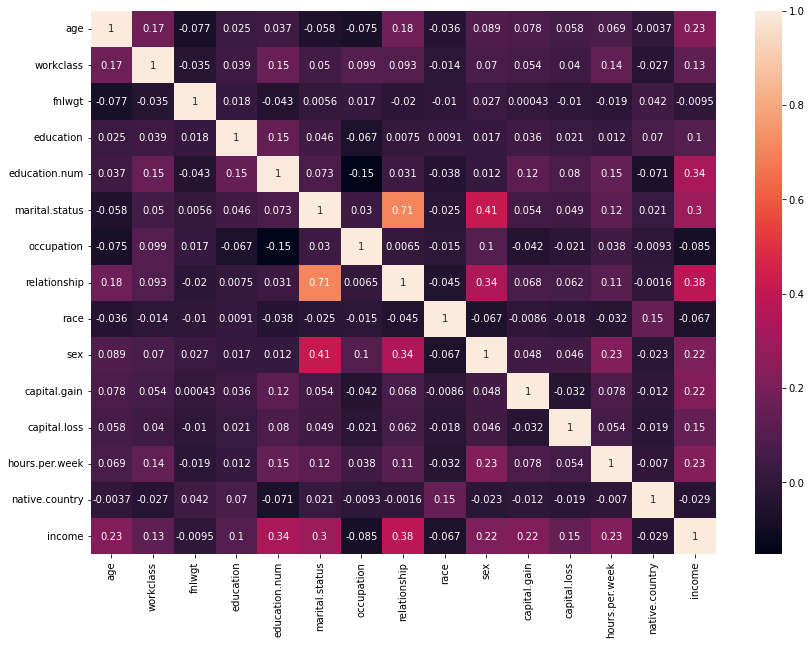

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(), annot=True)

The variables "fnlwgt", "occupation", "race", "education" and "native country" will be removed. The variable "education" is removed as it was redundant with "education.num".

In [19]:
train.drop(["fnlwgt","occupation","race","education","native.country"], axis = 1, inplace = True)


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   sex             32561 non-null  int64
 6   capital.gain    32561 non-null  int64
 7   capital.loss    32561 non-null  int64
 8   hours.per.week  32561 non-null  int64
 9   income          32561 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


<AxesSubplot:>

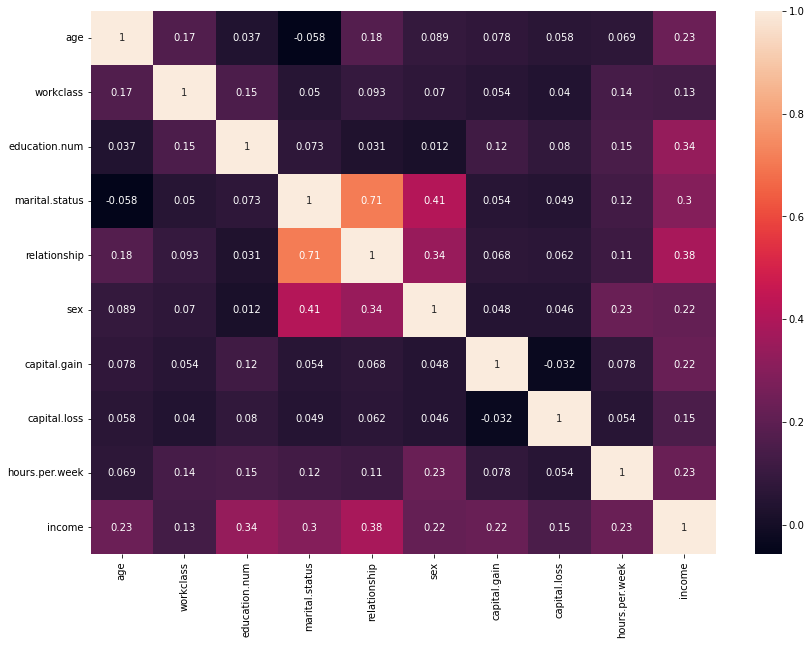

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(), annot=True)

Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x = train.drop('income', axis = 1)
y = train['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Using k-NN method

In [24]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [25]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.1556965912580612 at K = 8


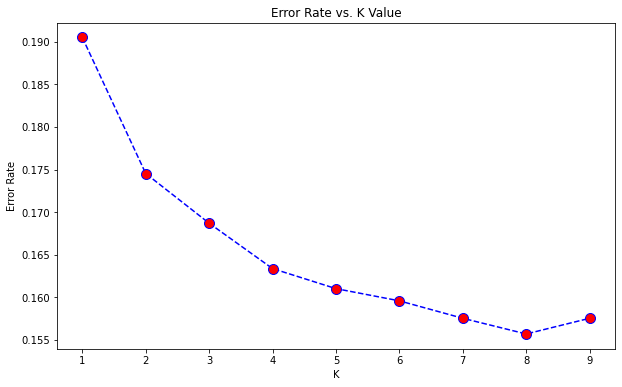

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

Optimum ’n’ neighbors 8 is used for maximum accuracy result, since 8 has the minimum number of error rate

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [28]:
# Precision & Sensitivity/Recall Report k-NN
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7429
           1       0.74      0.54      0.62      2340

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.84      0.84      0.84      9769



Using Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()


GaussianNB()

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
# Precision & Sensitivity/Recall Report NB
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7429
           1       0.69      0.36      0.47      2340

    accuracy                           0.81      9769
   macro avg       0.76      0.65      0.68      9769
weighted avg       0.79      0.81      0.78      9769



Using Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred_dt = dtree.predict(x_test)

In [33]:
# Precision & Sensitivity/Recall Report DT
print(classification_report(y_true=y_test,y_pred=pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7429
           1       0.64      0.58      0.61      2340

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769



Evaluation By Comparison

In [34]:
#Confusian Matrix 

from sklearn.metrics import confusion_matrix,accuracy_score
#kNN
print(confusion_matrix(y_test,pred))
#NB
print(confusion_matrix(y_test,y_pred))
#DT
print(confusion_matrix(y_test,pred_dt))

[[6992  437]
 [1084 1256]]
[[7051  378]
 [1504  836]]
[[6672  757]
 [ 989 1351]]


In [35]:
#Precision

from sklearn.metrics import precision_score, recall_score, f1_score
#kNN
print('Precision for k-NN:', precision_score(y_test,pred)*100)
#NB
print('Precision for NB:',precision_score(y_test,y_pred)*100)
#DT
print('Precision for DT:',precision_score(y_test,pred_dt)*100)

Precision for k-NN: 74.187832250443
Precision for NB: 68.86326194398681
Precision for DT: 64.08918406072107


In [36]:
#Accuracy
#kNN
print('Accuracy for k-NN:', accuracy_score(y_test,pred)*100)
#NB
print('Accuracy for NB:', accuracy_score(y_test,y_pred)*100)
#DT
print('Accuracy for DT:', accuracy_score(y_test,pred_dt)*100)

Accuracy for k-NN: 84.43034087419387
Accuracy for NB: 80.7349779916061
Accuracy for DT: 82.12713686150066


In [37]:
#RMSE

import math
from sklearn.metrics import mean_squared_error
#kNN
print('k-NN:', math.sqrt(mean_squared_error(y_test,pred)))
#NB
print('NB:', math.sqrt(mean_squared_error(y_test,y_pred)))
#DT
print('DT:', math.sqrt(mean_squared_error(y_test,pred_dt)))

k-NN: 0.39458407375116045
NB: 0.43891937765828815
DT: 0.4227630913230167


In [38]:
#Recall
#kNN
print('Recall for k-NN:', recall_score(y_test,pred))
#NB
print('Recall for NB:', recall_score(y_test,y_pred))
#DT
print('Recall for DT:', recall_score(y_test,pred_dt))

Recall for k-NN: 0.5367521367521367
Recall for NB: 0.3572649572649573
Recall for DT: 0.5773504273504273
